# Features Engineering

In [4]:
import pandas as pd

Retour quotidien : return = (close - open) / open.

Volatilité quotidienne : volatility = high - low.

Amplitude : amplitude = high - low (mesure de l'intervalle de fluctuation intrajournalière).

Variation du prix par rapport à l'ouverture : price_change = close - open.

In [10]:
merged_df = pd.read_csv("data/processed/merged_data.csv")


def create_performance_features(df):
    df['Return'] = (df['Close'] - df['Open']) / df['Open']
    df['Volatility'] = df['High'] - df['Low']
    df['Amplitude'] = df['High'] - df['Low']
    df['Price_change'] = df['Close'] - df['Open']
    df['Volatility_ratio'] = df['Volatility'] / df['Open']
    df['High_low_spread'] = (df['High'] - df['Low']) / df['Open']
    return df

merged_df = merged_df.groupby('Crypto').apply(create_performance_features)
print(merged_df.head())


                       Date      Open      High       Low     Close  \
Crypto                                                                
Bitcoin (BTC) 0  2024-12-30  93527.20  94903.32  91317.13  92643.21   
              1  2024-12-29  95174.05  95174.88  92881.79  93530.23   
              2  2024-12-28  94160.19  95525.90  94014.29  95163.93   
              3  2024-12-27  95704.98  97294.84  93310.74  94164.86   
              4  2024-12-26  99297.70  99884.57  95137.88  95795.52   

                 Adj Close        Volume         Crypto  Volatility    Return  \
Crypto                                                                          
Bitcoin (BTC) 0   92643.21  5.618800e+10  Bitcoin (BTC)     3586.19 -0.009452   
              1   93530.23  2.963589e+10  Bitcoin (BTC)     2293.09 -0.017272   
              2   95163.93  2.410744e+10  Bitcoin (BTC)     1511.61  0.010660   
              3   94164.86  5.241993e+10  Bitcoin (BTC)     3984.10 -0.016092   
              4 

C:\Users\lalab\AppData\Local\Temp\ipykernel_18844\2809285914.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = merged_df.groupby('Crypto').apply(create_performance_features)


## Indicateurs de Tendance

### Moyenne Mobile Simple (SMA)

In [11]:
merged_df['SMA_7'] = merged_df['Close'].rolling(window=7).mean()
merged_df['SMA_50'] = merged_df['Close'].rolling(window=50).mean()

### Moyenne Mobile Exponentielle (EMA)

In [12]:
merged_df['EMA_10'] = merged_df['Close'].ewm(span=10).mean()
merged_df['EMA_50'] = merged_df['Close'].ewm(span=50).mean()

### Rate of Change (RoC)

In [13]:
merged_df['RoC'] = (merged_df['Close'] - merged_df['Close'].shift(10)) / merged_df['Close'].shift(10) * 100

## Indicateurs de volatilité 

### Bollinger Bands (BB)

In [14]:
merged_df['BB_upper'] = merged_df['SMA_50'] + (merged_df['Close'].rolling(window=50).std() * 2)
merged_df['BB_lower'] = merged_df['SMA_50'] - (merged_df['Close'].rolling(window=50).std() * 2)

### Average True Range (ATR) 

In [15]:
merged_df['ATR'] = merged_df['High'] - merged_df['Low']
merged_df['ATR'] = merged_df['ATR'].rolling(window=14).mean()

## Indicateurs de Momentum

### Relative Strength Index (RSI) 

In [16]:
delta = merged_df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
merged_df['RSI'] = 100 - (100 / (1 + rs))

## Indicateurs de Volume

### Volume Weighted Average Price (VWAP) 

In [17]:
merged_df['VWAP'] = (merged_df['Close'] * merged_df['Volume']).cumsum() / merged_df['Volume'].cumsum()

### On Balance Volume (OBV) 

In [18]:
import numpy as np
merged_df['OBV'] = (merged_df['Volume'] * np.sign(merged_df['Close'].diff())).cumsum()

In [19]:
merged_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Crypto',
       'Volatility', 'Return', 'Amplitude', 'Price_change', 'Volatility_ratio',
       'High_low_spread', 'SMA_7', 'SMA_50', 'EMA_10', 'EMA_50', 'RoC',
       'BB_upper', 'BB_lower', 'ATR', 'RSI', 'VWAP', 'OBV'],
      dtype='object')

## Graphique des séries temporelles

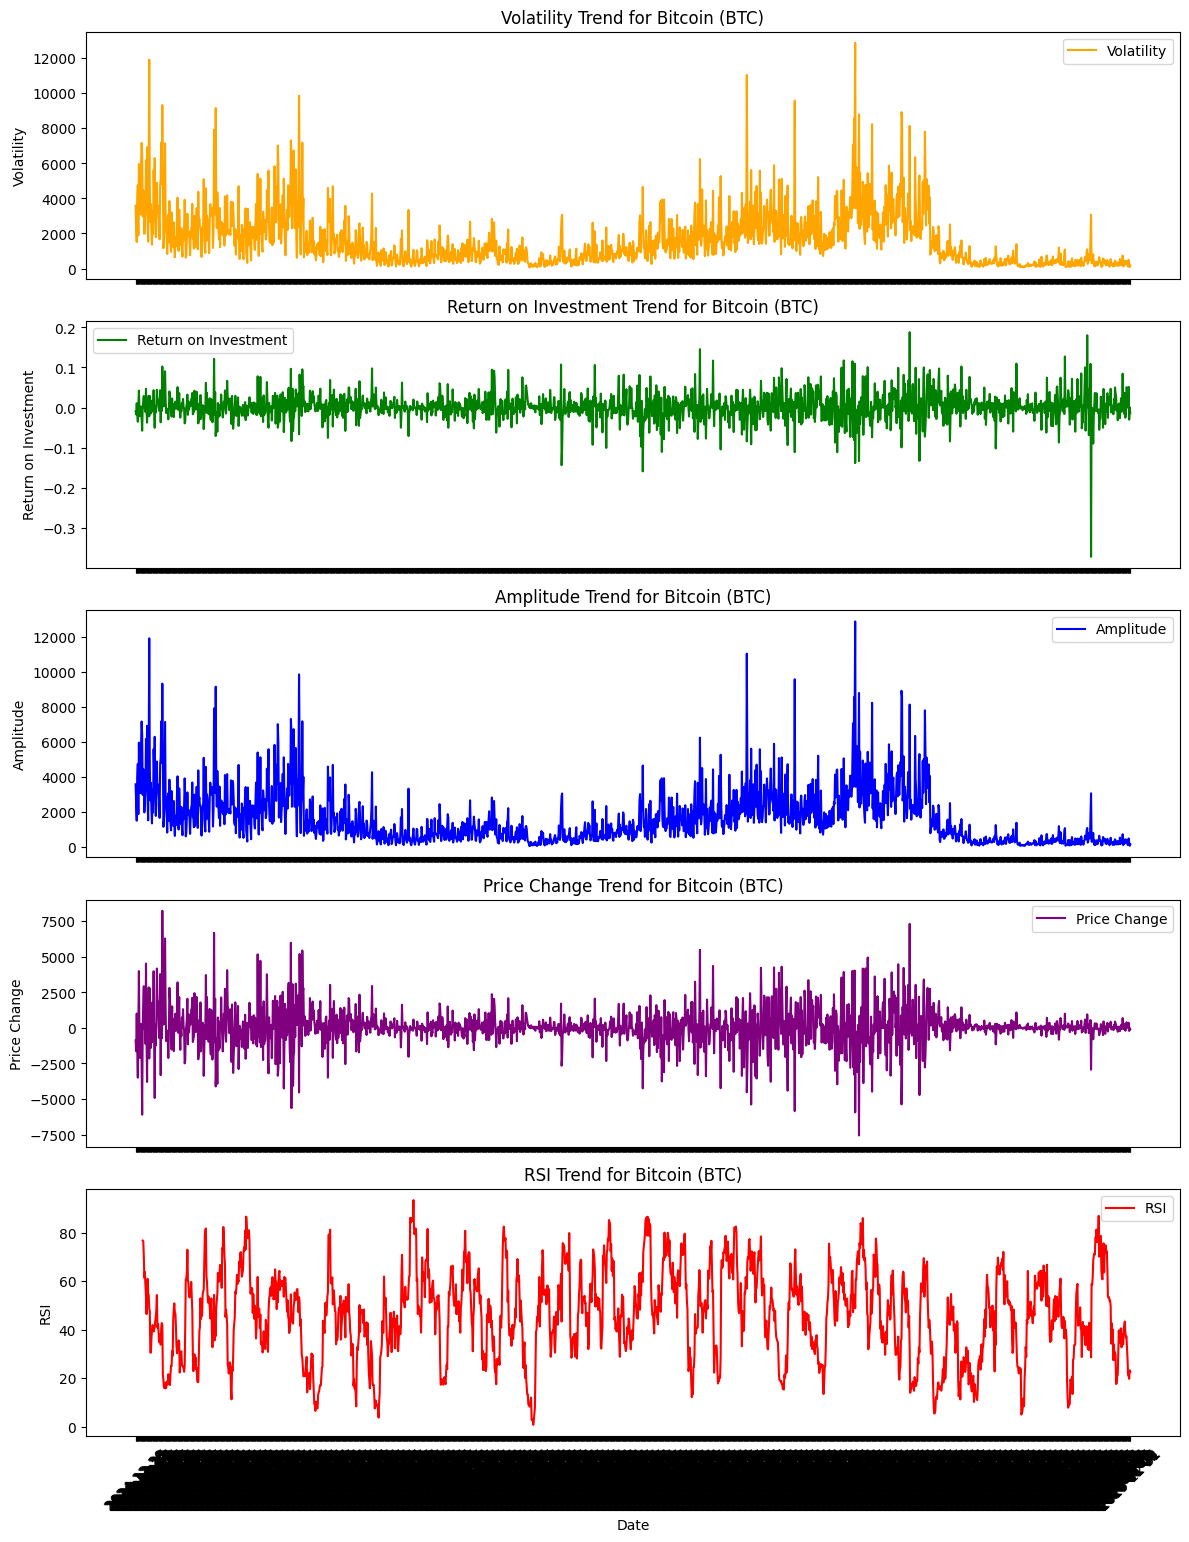

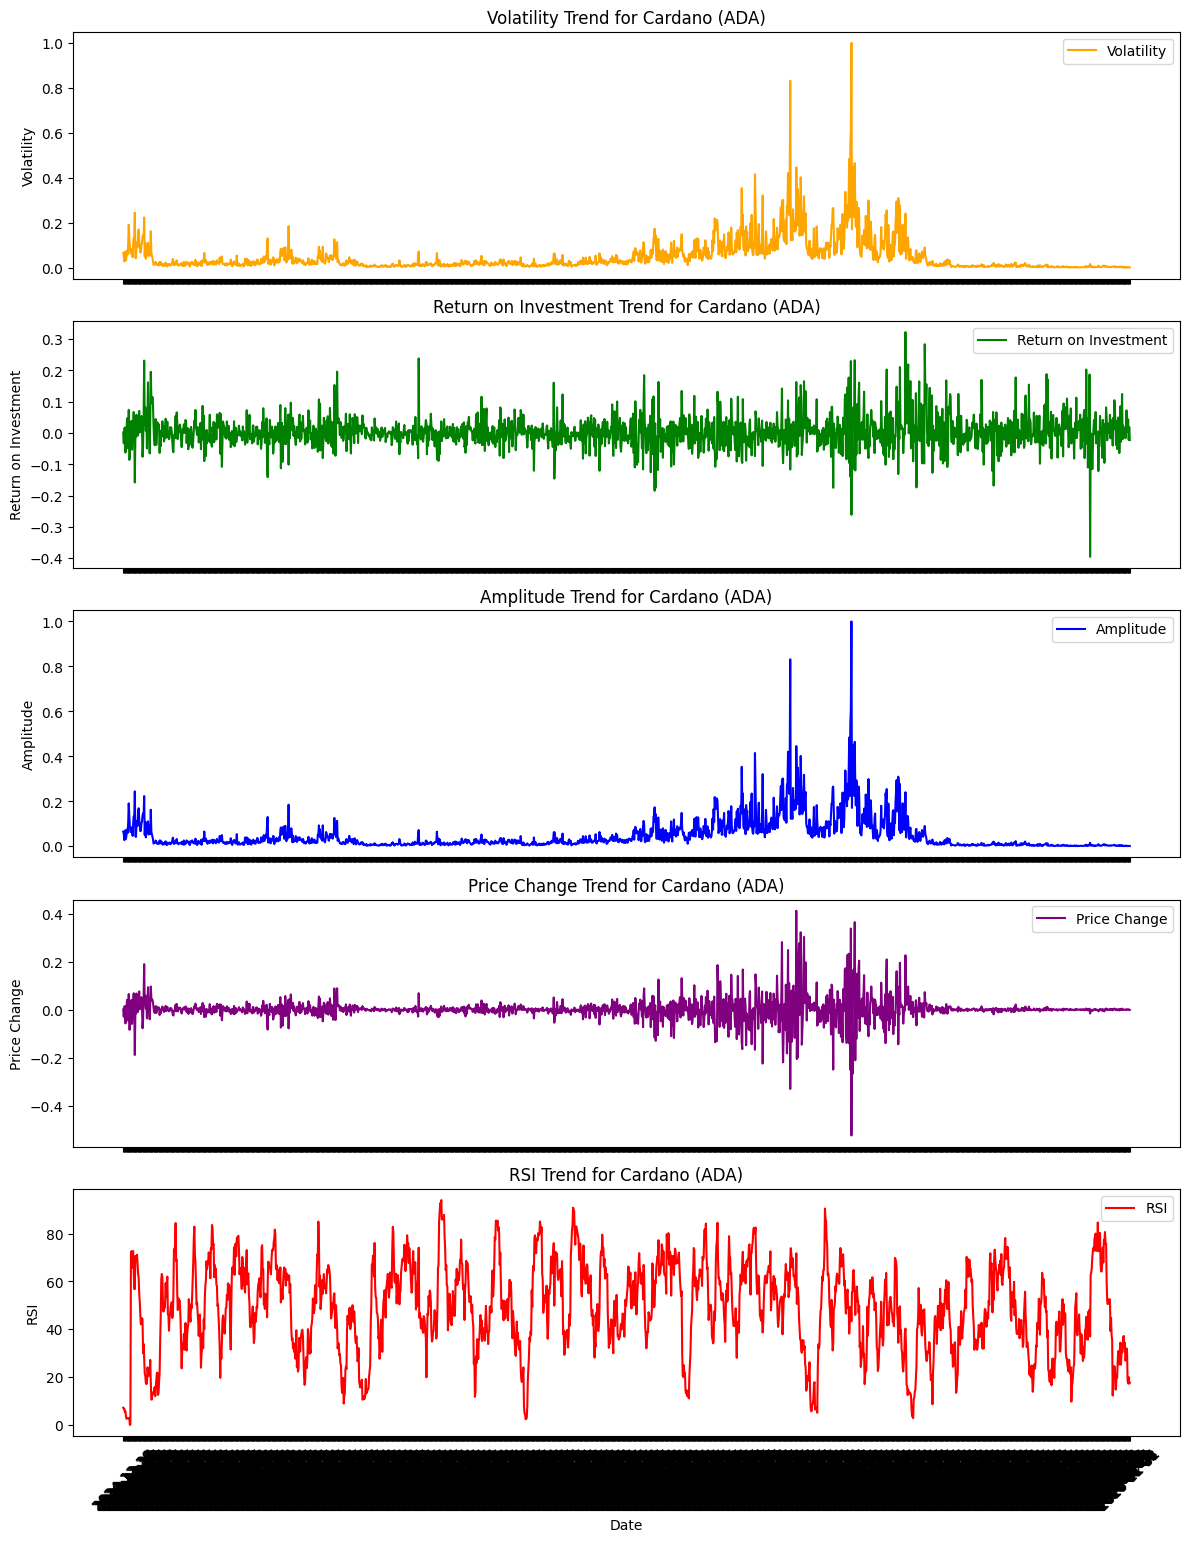

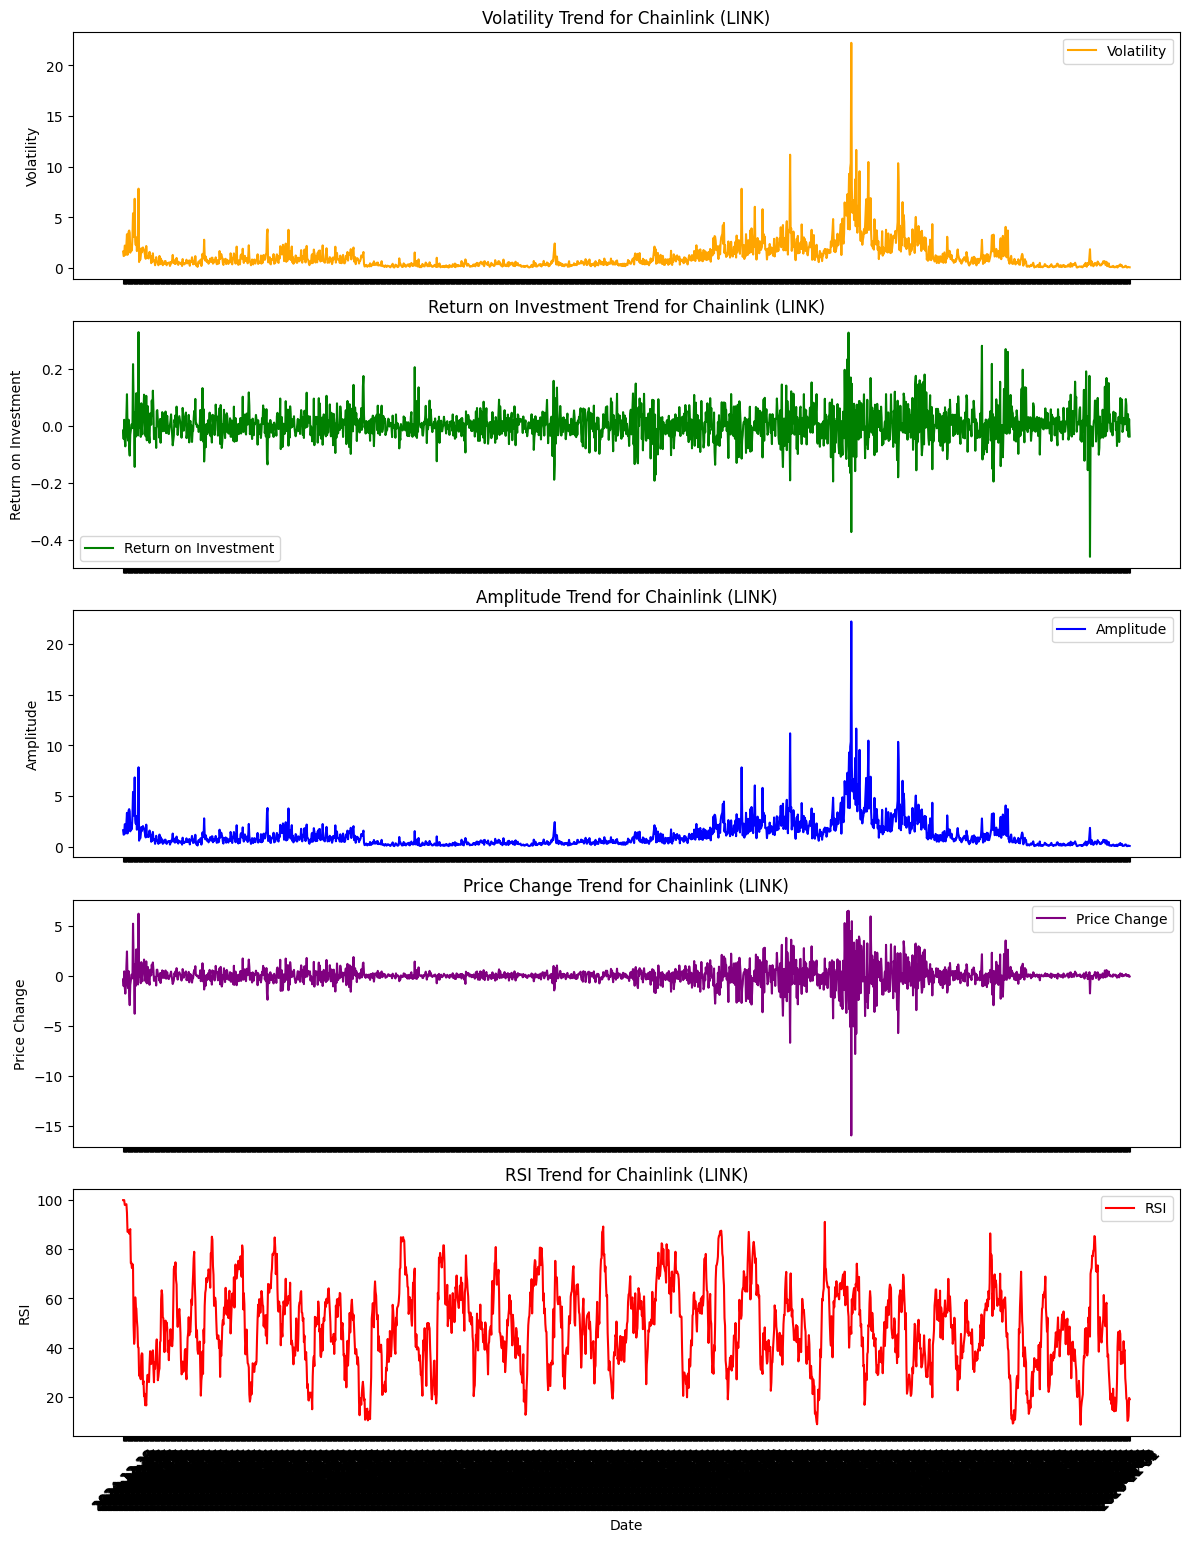

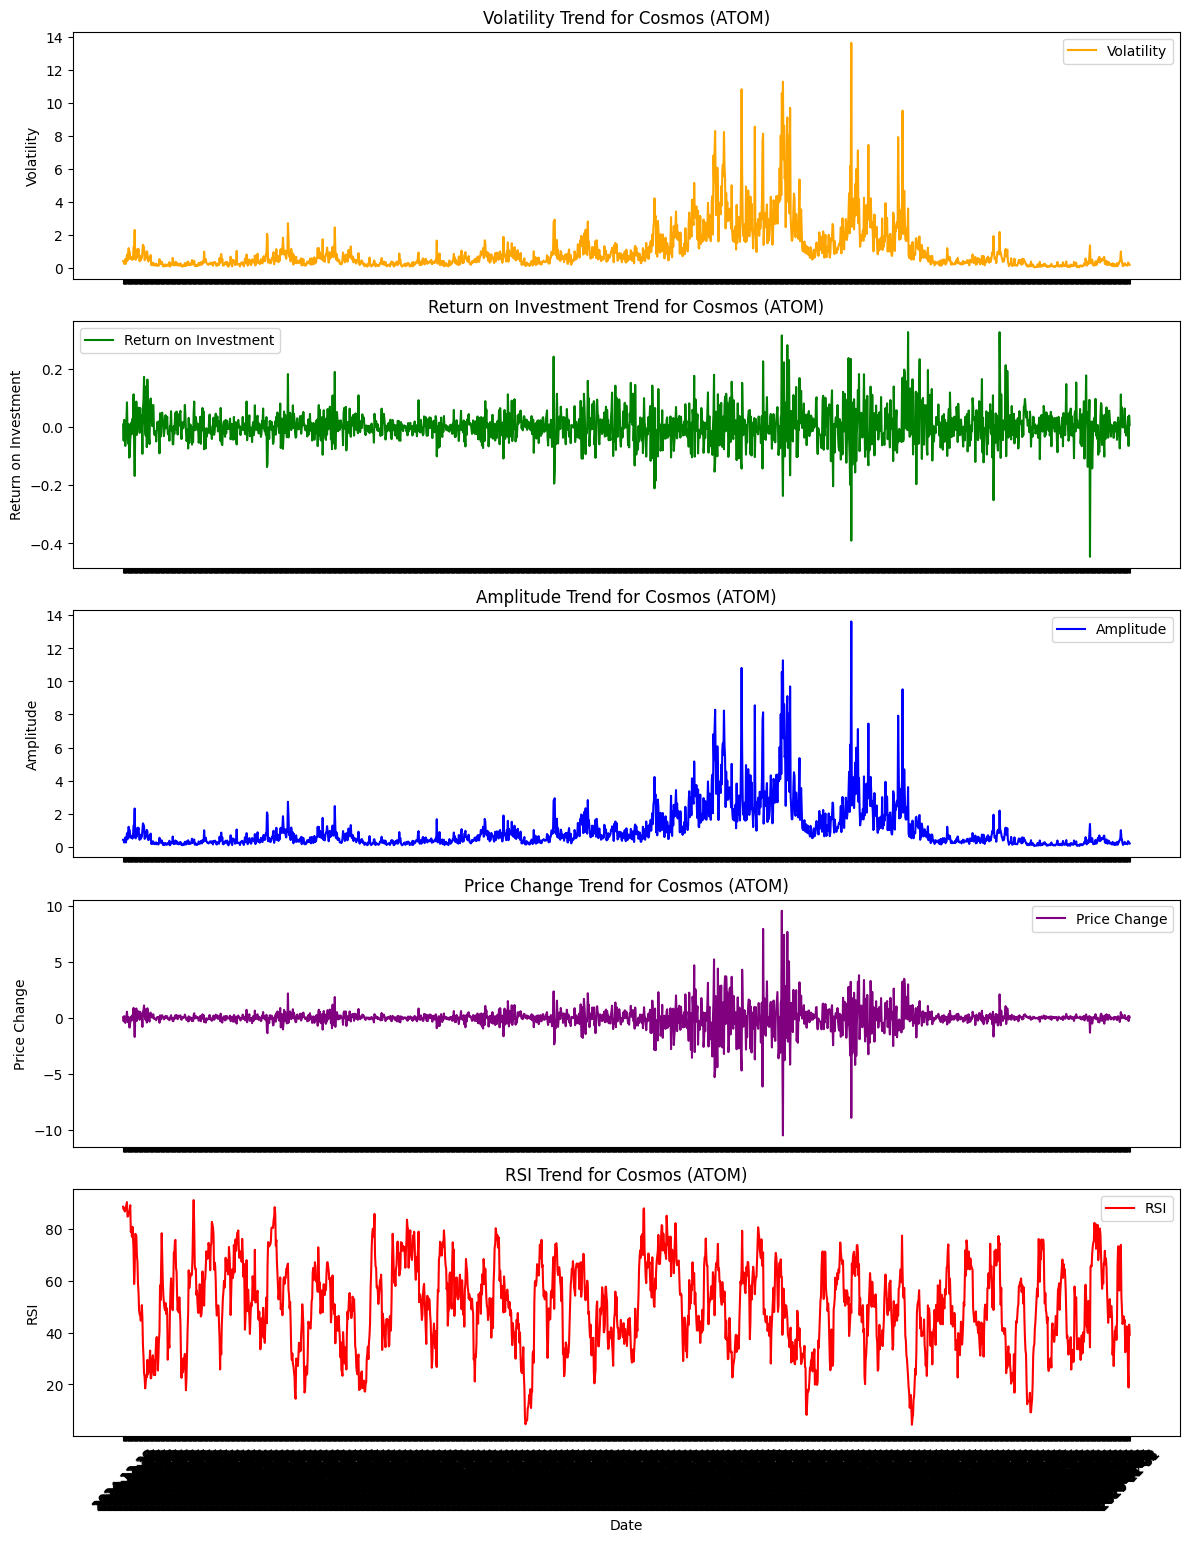

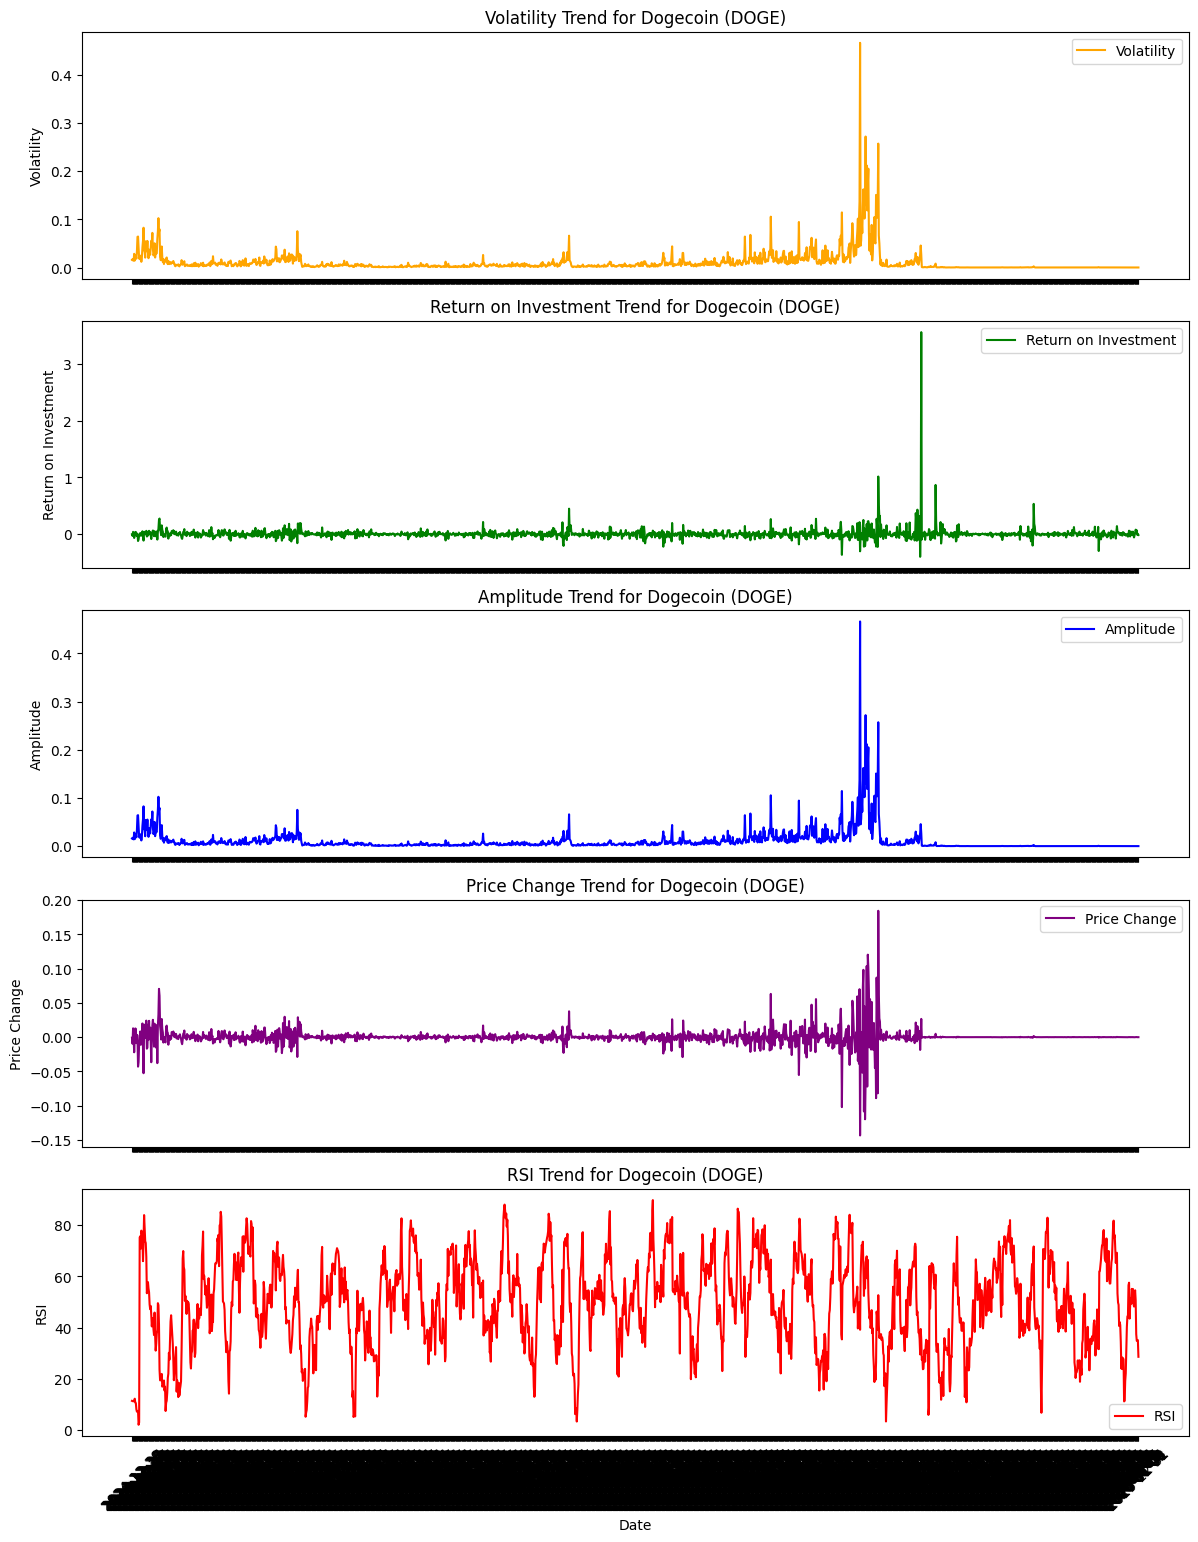

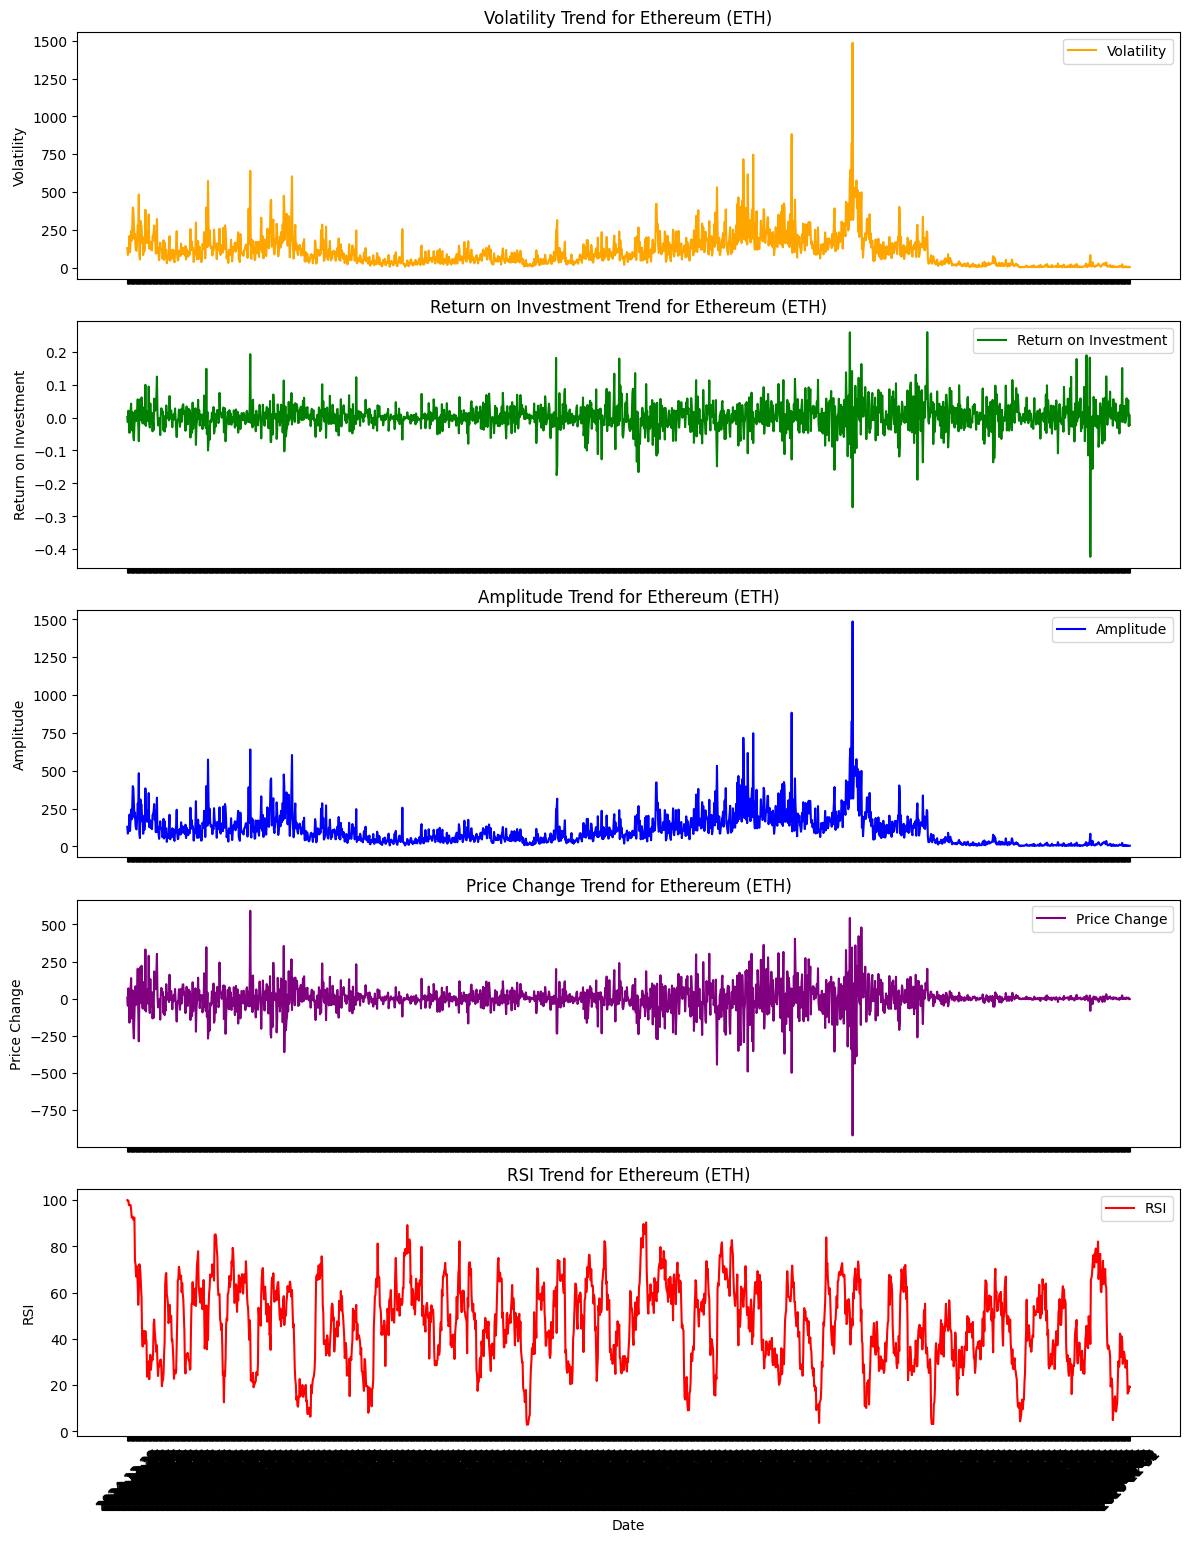

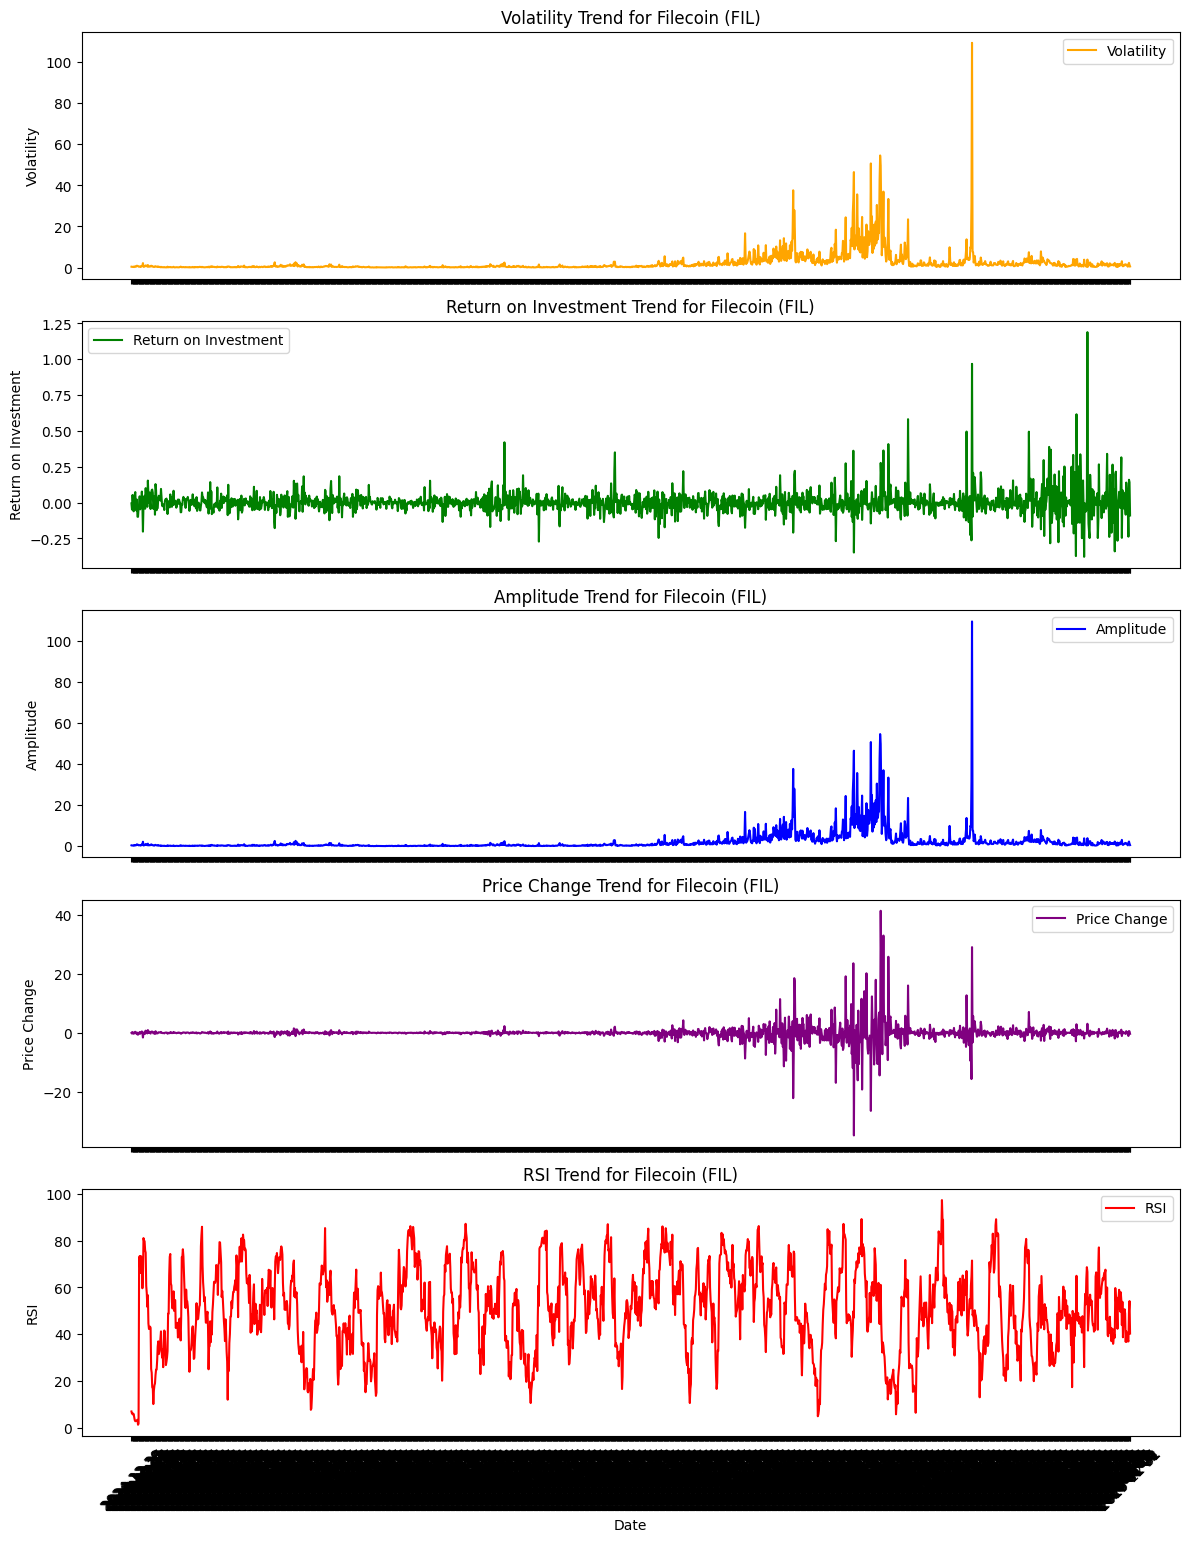

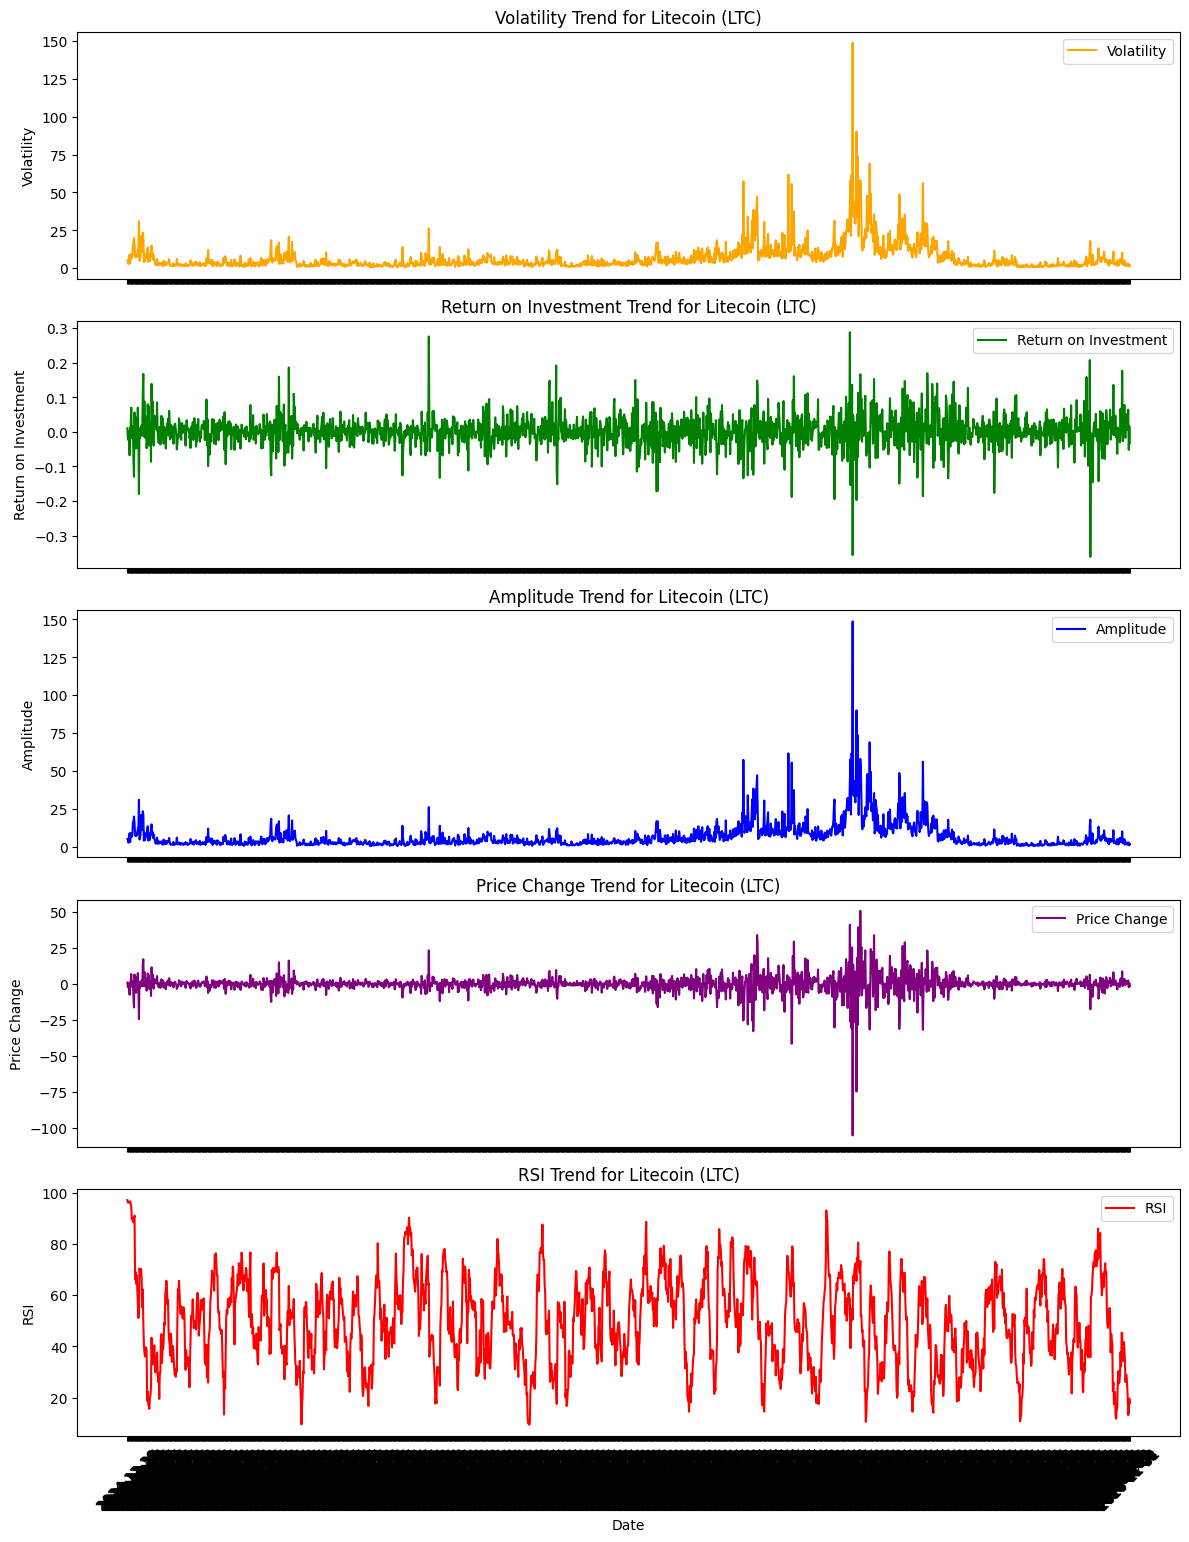

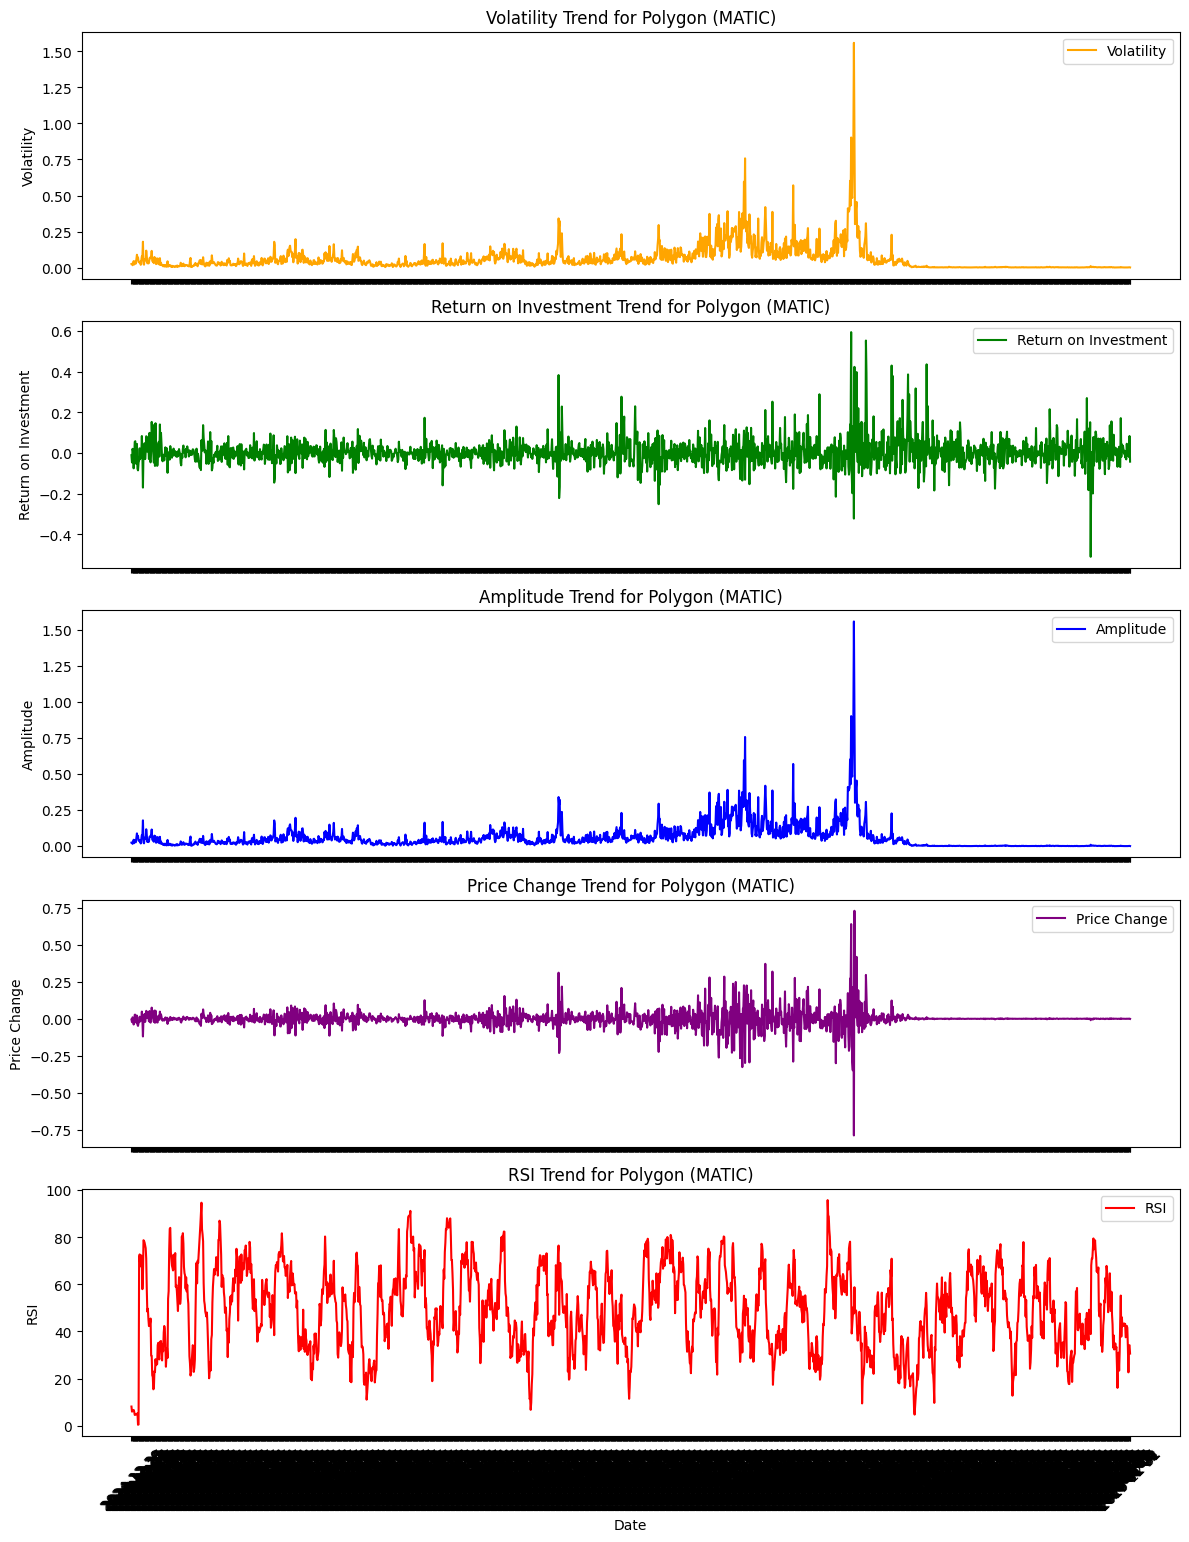

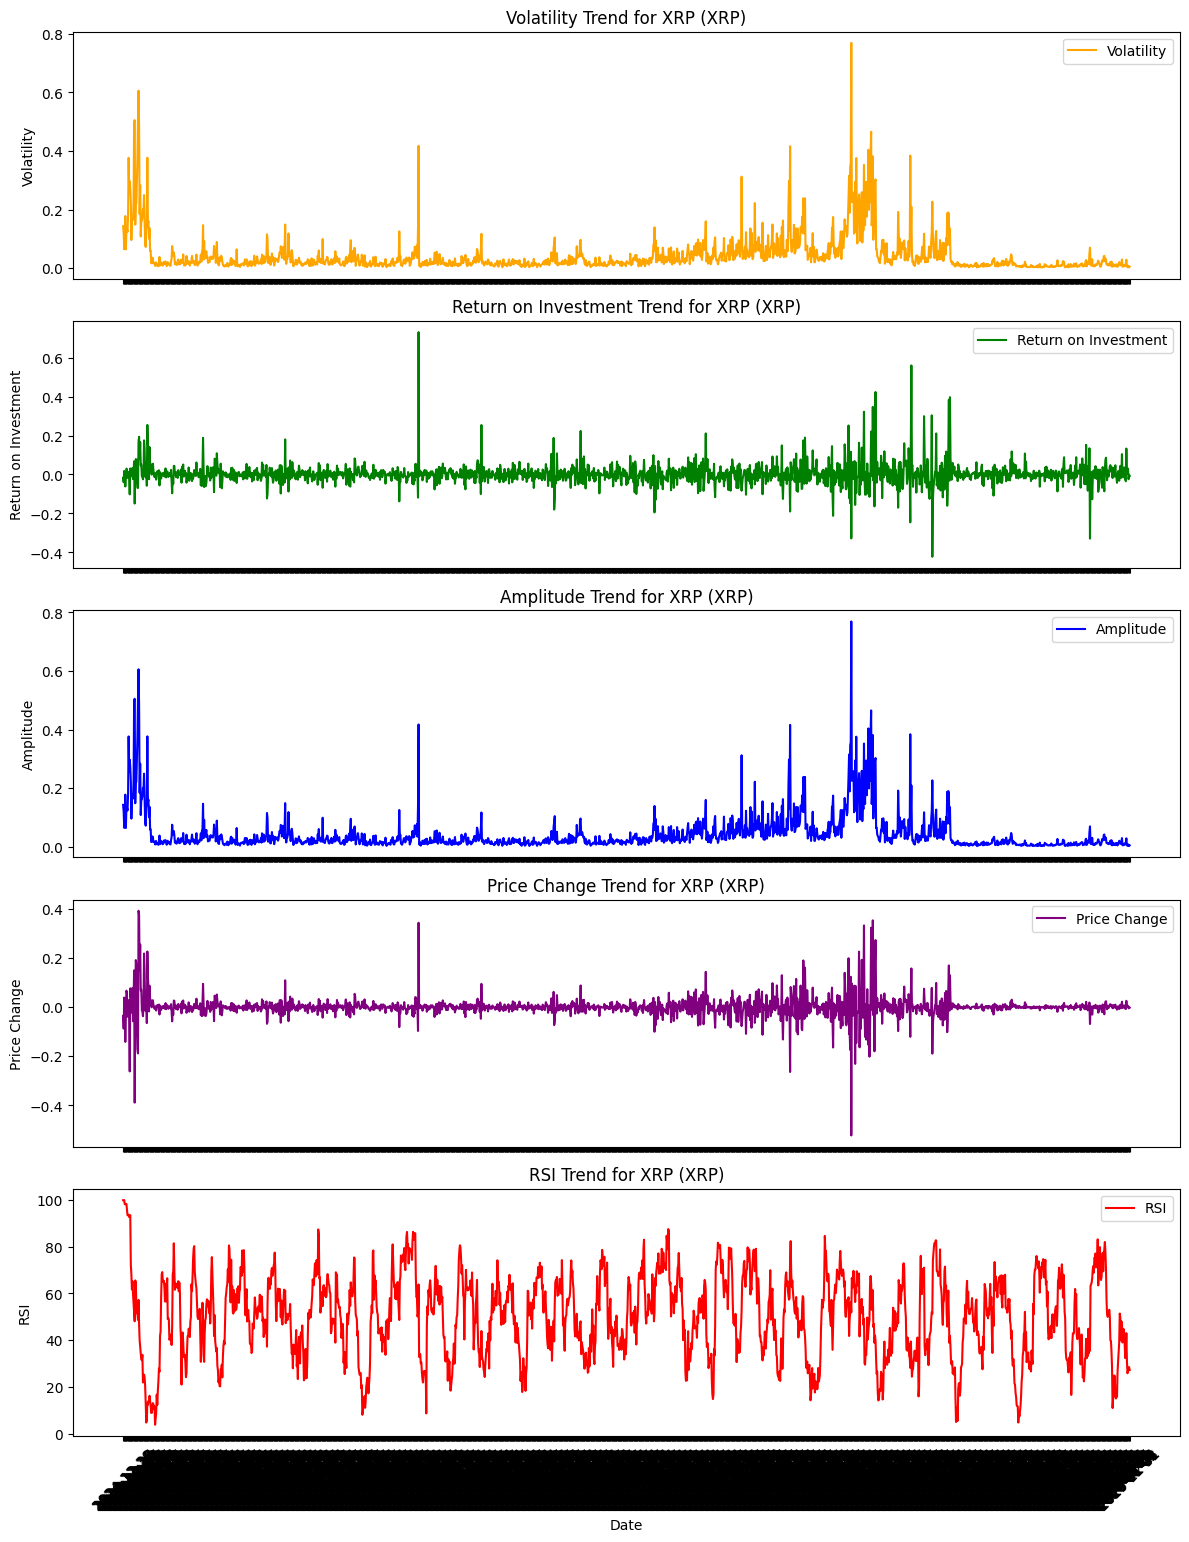

In [20]:
import matplotlib.pyplot as plt


def plot_crypto_trends(df, crypto_name):
  
    crypto_df = df[df['Crypto'] == crypto_name]
    
    fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharex=True)

    axes[0].plot(crypto_df['Date'], crypto_df['Volatility'], label='Volatility', color='orange')
    axes[0].set_title(f'Volatility Trend for {crypto_name}')
    axes[0].set_ylabel('Volatility')
    axes[0].legend()

    axes[1].plot(crypto_df['Date'], crypto_df['Return'], label='Return on Investment', color='green')
    axes[1].set_title(f'Return on Investment Trend for {crypto_name}')
    axes[1].set_ylabel('Return on Investment')
    axes[1].legend()

    axes[2].plot(crypto_df['Date'], crypto_df['Amplitude'], label='Amplitude', color='blue')
    axes[2].set_title(f'Amplitude Trend for {crypto_name}')
    axes[2].set_ylabel('Amplitude')
    axes[2].legend()

    axes[3].plot(crypto_df['Date'], crypto_df['Price_change'], label='Price Change', color='purple')
    axes[3].set_title(f'Price Change Trend for {crypto_name}')
    axes[3].set_ylabel('Price Change')
    axes[3].legend()

    axes[4].plot(crypto_df['Date'], crypto_df['RSI'], label='RSI', color='red')
    axes[4].set_title(f'RSI Trend for {crypto_name}')
    axes[4].set_xlabel('Date')
    axes[4].set_ylabel('RSI')
    axes[4].legend()

    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

crypto_names = merged_df['Crypto'].unique()

def plot_crypto_trends_for_all(df, crypto_names):
    for crypto_name in crypto_names:
        plot_crypto_trends(df, crypto_name)

plot_crypto_trends_for_all(merged_df, crypto_names)



## Normalisation 

### Variables financières

In [21]:
merged_df.head()

Date      Open      High       Low     Close  \
Crypto                                                                
Bitcoin (BTC) 0  2024-12-30  93527.20  94903.32  91317.13  92643.21   
              1  2024-12-29  95174.05  95174.88  92881.79  93530.23   
              2  2024-12-28  94160.19  95525.90  94014.29  95163.93   
              3  2024-12-27  95704.98  97294.84  93310.74  94164.86   
              4  2024-12-26  99297.70  99884.57  95137.88  95795.52   

                 Adj Close        Volume         Crypto  Volatility    Return  \
Crypto                                                                          
Bitcoin (BTC) 0   92643.21  5.618800e+10  Bitcoin (BTC)     3586.19 -0.009452   
              1   93530.23  2.963589e+10  Bitcoin (BTC)     2293.09 -0.017272   
              2   95163.93  2.410744e+10  Bitcoin (BTC)     1511.61  0.010660   
              3   94164.86  5.241993e+10  Bitcoin (BTC)     3984.10 -0.016092   
              4   95795.52  4.705498e+10  Bitcoin (BTC)     4746.69 -0.035269   

                 ...  SMA_50        EMA_10        EMA_50  RoC  BB_upper  \
Crypto           ...                                                      
Bitcoin (BTC) 0  ...     NaN  92643.210000  92643.210000  NaN       NaN   
              1  ...     NaN  93131.071000  93095.590200  NaN       NaN   
              2  ...     NaN  93948.266811  93812.794815  NaN       NaN   
              3  ...     NaN  94019.624616  93906.161066  NaN       NaN   
              4  ...     NaN  94529.435881  94314.854673  NaN       NaN   

                 BB_lower  ATR  RSI          VWAP           OBV  
Crypto                                                           
Bitcoin (BTC) 0       NaN  NaN  NaN  92643.210000           NaN  
              1       NaN  NaN  NaN  92949.507271  2.963589e+10  
              2       NaN  NaN  NaN  93435.120035  5.374332e+10  
              3       NaN  NaN  NaN  93670.738294  1.323387e+09  
              4       NaN  NaN  NaN  94148.190935  4.837837e+10  

[5 rows x 25 columns]

In [25]:
nan_percentage = merged_df.isna().mean() * 100

for column, percentage in nan_percentage.items():
    print(f"Colonne: {column} | Pourcentage de NaN: {percentage:.2f}%")

Colonne: Date | Pourcentage de NaN: 0.00%
Colonne: Open | Pourcentage de NaN: 0.00%
Colonne: High | Pourcentage de NaN: 0.00%
Colonne: Low | Pourcentage de NaN: 0.00%
Colonne: Close | Pourcentage de NaN: 0.00%
Colonne: Adj Close | Pourcentage de NaN: 0.00%
Colonne: Volume | Pourcentage de NaN: 0.00%
Colonne: Crypto | Pourcentage de NaN: 0.00%
Colonne: Volatility | Pourcentage de NaN: 0.00%
Colonne: Return | Pourcentage de NaN: 0.00%
Colonne: Amplitude | Pourcentage de NaN: 0.00%
Colonne: Price_change | Pourcentage de NaN: 0.00%
Colonne: Volatility_ratio | Pourcentage de NaN: 0.00%
Colonne: High_low_spread | Pourcentage de NaN: 0.00%
Colonne: SMA_7 | Pourcentage de NaN: 0.00%
Colonne: SMA_50 | Pourcentage de NaN: 0.00%
Colonne: EMA_10 | Pourcentage de NaN: 0.00%
Colonne: EMA_50 | Pourcentage de NaN: 0.00%
Colonne: RoC | Pourcentage de NaN: 0.00%
Colonne: BB_upper | Pourcentage de NaN: 0.00%
Colonne: BB_lower | Pourcentage de NaN: 0.00%
Colonne: ATR | Pourcentage de NaN: 0.00%
Colonne: R

In [26]:
merged_df.shape

(18221, 25)

In [28]:
merged_df = merged_df.dropna()


print(f"Nombre de lignes après nettoyage : {len(merged_df)}")

Nombre de lignes après nettoyage : 18221


In [29]:
from sklearn.preprocessing import StandardScaler

cols_to_standardize = merged_df.columns.difference(["Crypto", "Date"])

scaler = StandardScaler()
merged_df[cols_to_standardize] = scaler.fit_transform(merged_df[cols_to_standardize])

print(merged_df.head())

                        Date      Open      High       Low     Close  \
Crypto                                                                 
Bitcoin (BTC) 49  2024-11-11  6.530050  7.139462  6.675993  7.218964   
              50  2024-11-10  6.216153  6.464041  6.352735  6.521141   
              51  2024-11-09  6.197522  6.086736  6.283903  6.207711   
              52  2024-11-08  6.142032  6.113319  6.273030  6.187915   
              53  2024-11-07  6.119461  6.087595  6.171447  6.133579   

                  Adj Close    Volume         Crypto  Volatility    Return  \
Crypto                                                                       
Bitcoin (BTC) 49   7.218964  9.266211  Bitcoin (BTC)   14.099774  1.546169   
              50   6.521141  6.341173  Bitcoin (BTC)    7.305805  0.703715   
              51   6.207711  1.915046  Bitcoin (BTC)    1.531564 -0.001195   
              52   6.187915  4.077438  Bitcoin (BTC)    2.216818  0.085356   
              53   6.133579

In [32]:
import os

file_path = "data/feature/feature_data.csv"

os.makedirs(os.path.dirname(file_path), exist_ok=True)


merged_df.to_csv(file_path, index=False)

print(f"Fichier enregistré avec succès dans {file_path}")


Fichier enregistré avec succès dans data/feature/feature_data.csv
